### Homework1——week7

#### Given a set of blue points, calculate the parameters of the fitted quadratic curve using the gradient descent method.

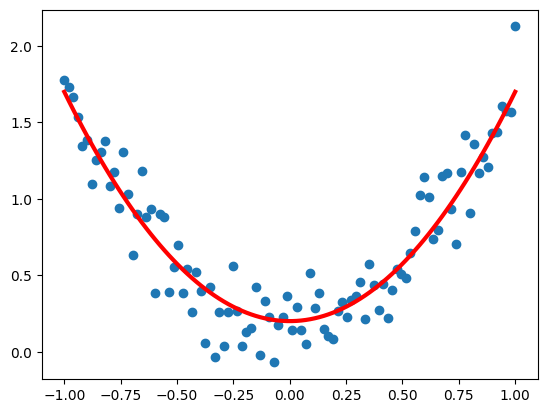

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 100)
y = 1.5*x*x + 0.2 + 0.2*np.random.randn(100)
plt.scatter(x, y)
plt.plot(x, 1.5*x*x + 0.2, 'r-', lw=3)
plt.show()

In [2]:
def compute_cost(a, b, c, x, y):
    """
    Compute the cost (mean squared error) for given parameters a, b, c of the quadratic curve.
    """
    m = len(x)
    predictions = a * x**2 + b * x + c
    return (1/(2*m)) * np.sum((predictions - y)**2)

def gradient_descent(a, b, c, x, y, learning_rate, iterations):
    """
    Perform gradient descent to learn a, b, c by minimizing the cost function.
    """
    m = len(x)
    cost_history = []

    for _ in range(iterations):
        predictions = a * x**2 + b * x + c

        # Derivatives of the cost function with respect to a, b, and c
        da = (1/m) * np.sum((predictions - y) * x**2)
        db = (1/m) * np.sum((predictions - y) * x)
        dc = (1/m) * np.sum(predictions - y)

        # Update rules
        a = a - learning_rate * da
        b = b - learning_rate * db
        c = c - learning_rate * dc

        cost = compute_cost(a, b, c, x, y)
        cost_history.append(cost)

    return a, b, c, cost_history

# Initial parameters
a_init = 0
b_init = 0
c_init = 0

# Gradient descent settings
learning_rate = 0.1
iterations = 1000

# Performing gradient descent
a, b, c, cost_history = gradient_descent(a_init, b_init, c_init, x, y, learning_rate, iterations)

a, b, c, cost_history[-1]  # Return the final parameters and the last cost value



(1.5812491181783956,
 0.031809090618795874,
 0.17054310554777377,
 0.01464838709375175)

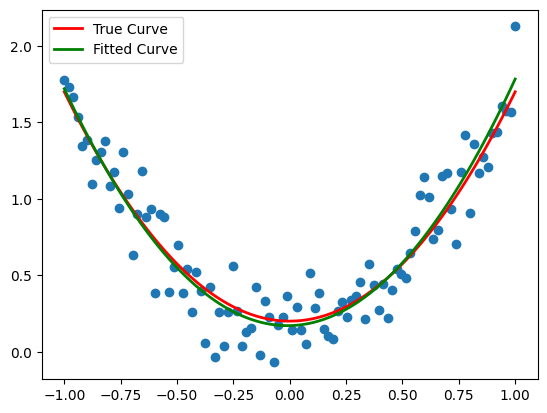

In [3]:
# Plotting the original data points
plt.scatter(x, y)

# Plotting the true quadratic curve
plt.plot(x, 1.5 * x * x + 0.2, 'r-', lw=2, label='True Curve')

# Plotting the fitted quadratic curve
plt.plot(x, a * x**2 + b * x + c, 'g-', lw=2, label='Fitted Curve')

plt.legend()
plt.show()


### Homework2——week7

In [5]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())

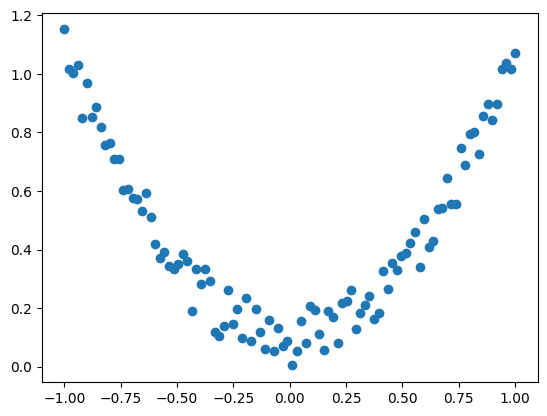

In [6]:
plt.scatter(x.numpy(), y.numpy())

## 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()，效果不行，换成relu激活会更好一点

In [7]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出


    def forward(self, x):
        x = F.sigmoid(self.hidden(x))  # Sigmoid 激活函数应用于隐藏层
        x = self.predict(x)  # 线性输出

        return x

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


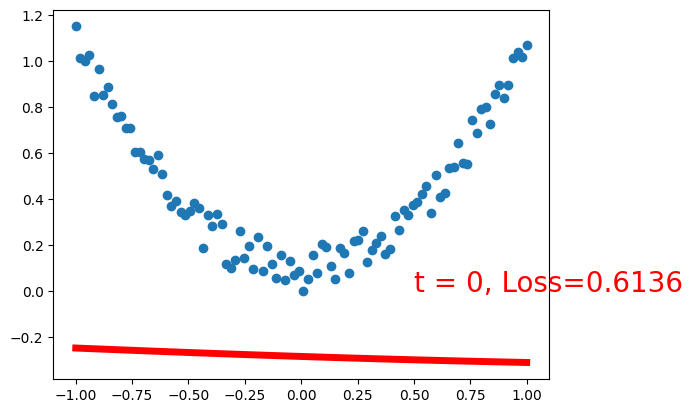

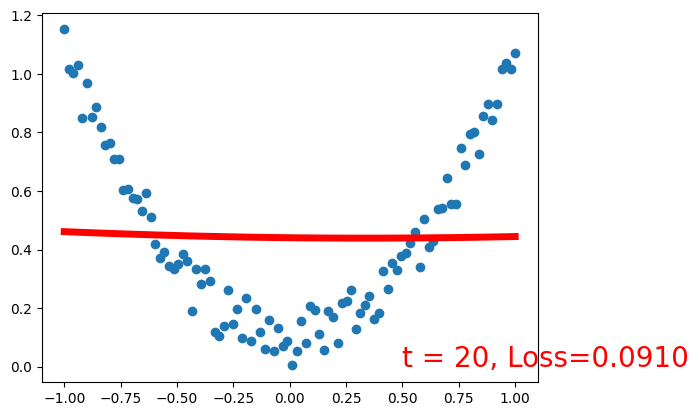

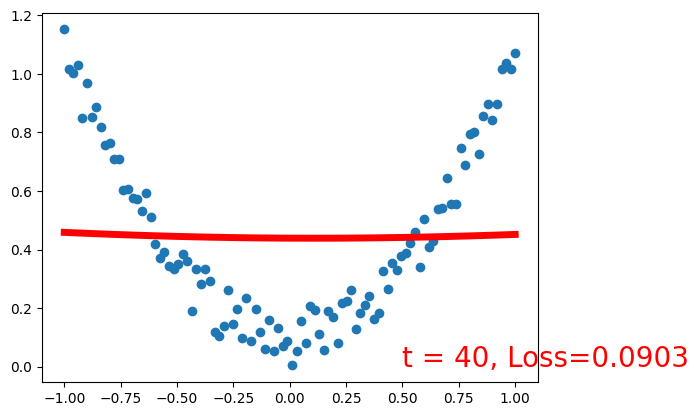

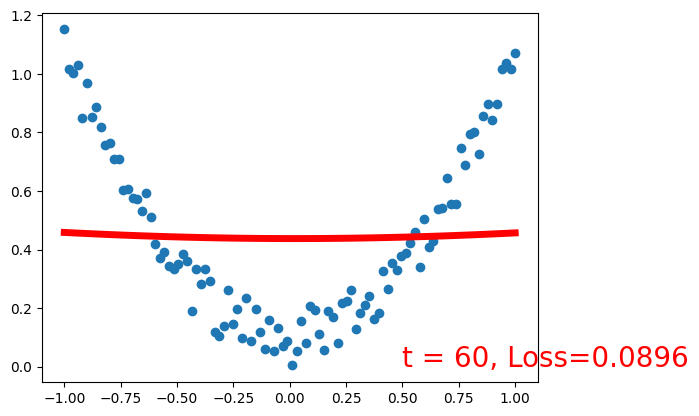

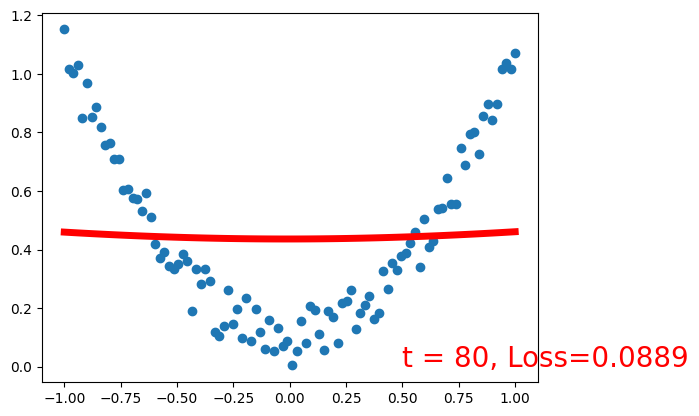

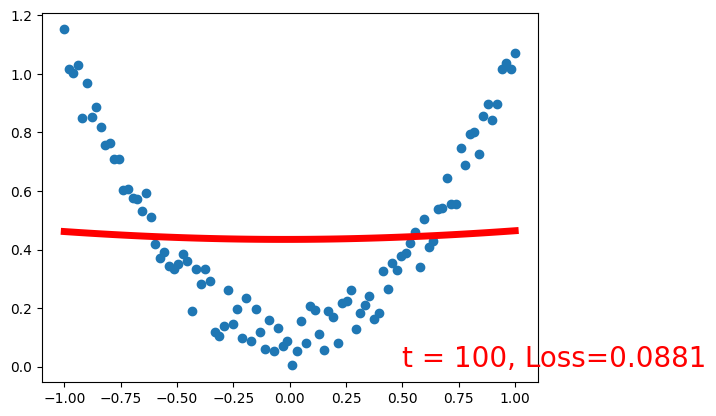

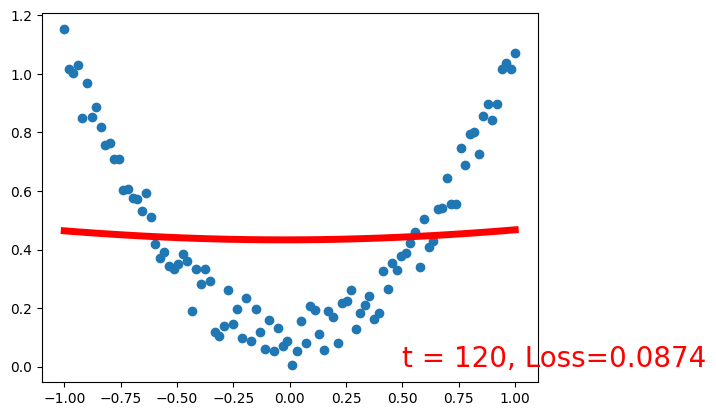

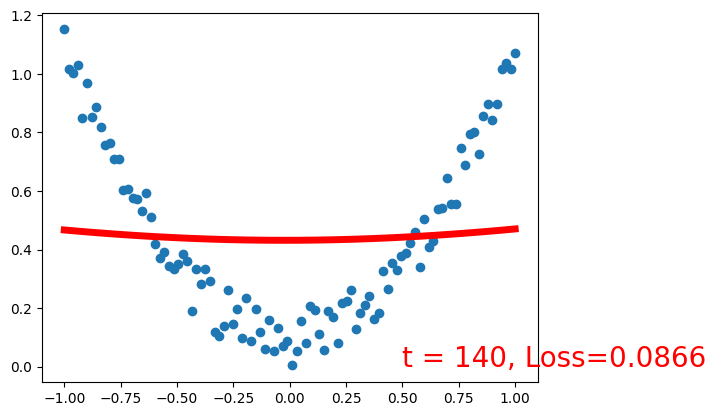

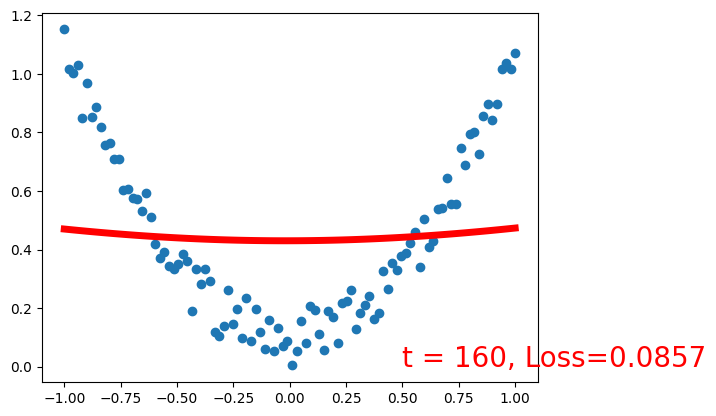

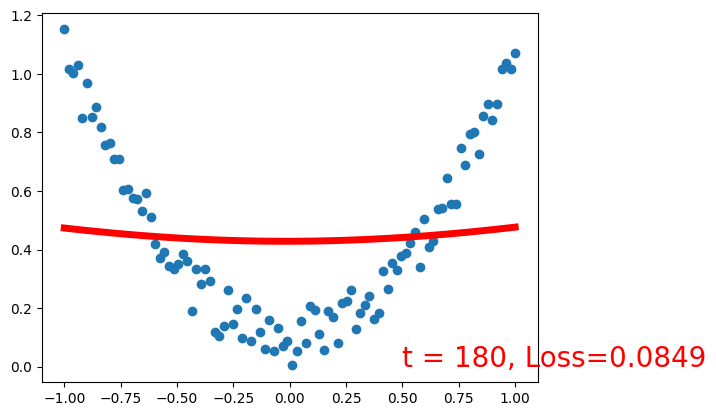

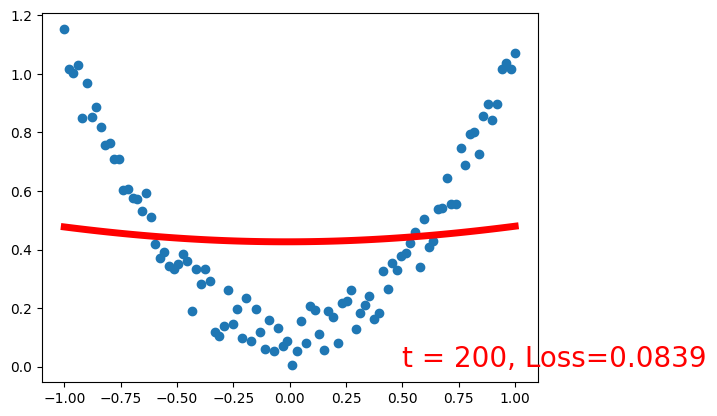

In [8]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

### 改成relu激活函数

In [9]:
# 定义网络
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)   # 输出层线性输出

    def forward(self, x):
        x = F.relu(self.hidden(x))  # ReLU 激活函数应用于隐藏层
        x = self.predict(x)  # 线性输出
        return x

Net(
  (hidden): Linear(in_features=1, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


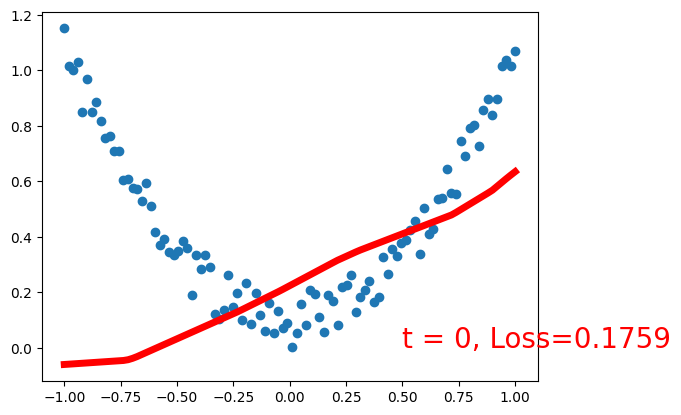

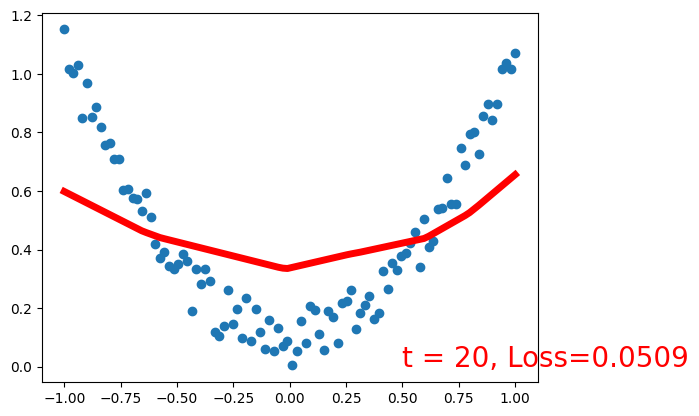

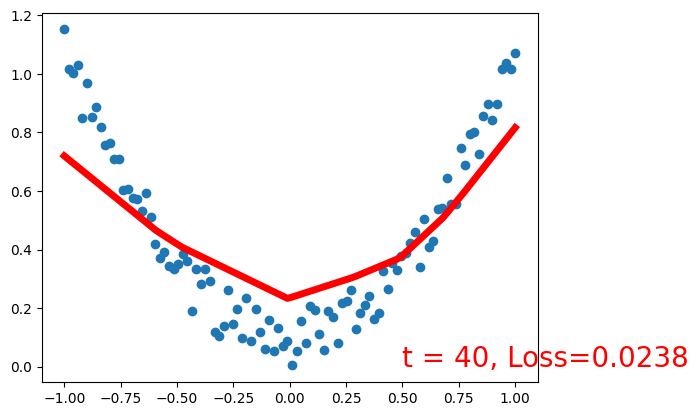

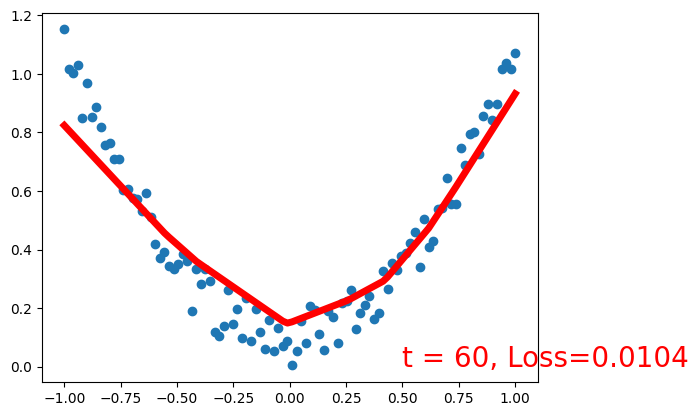

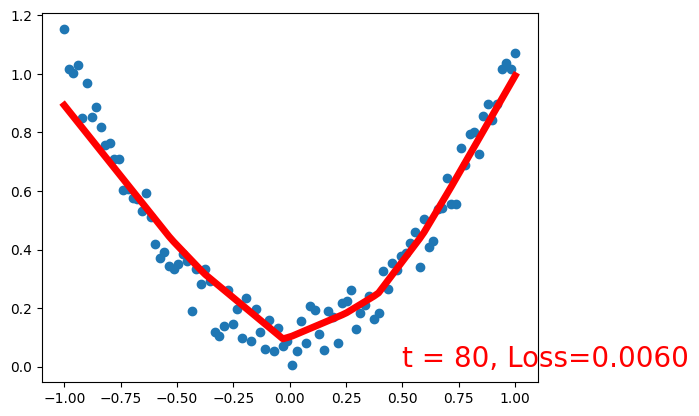

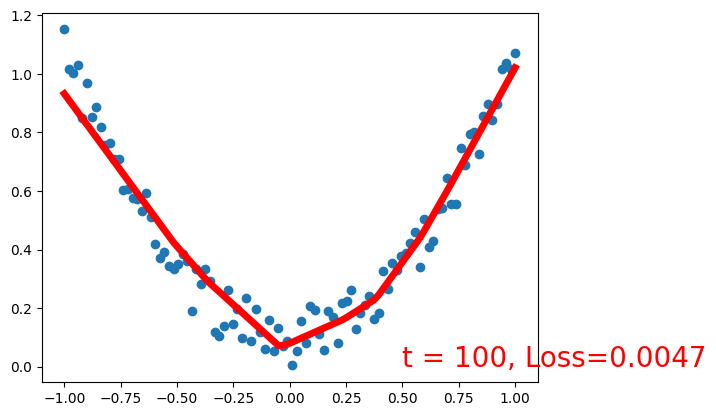

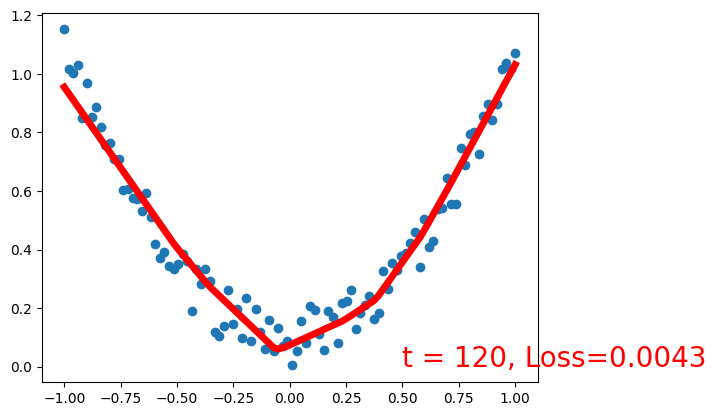

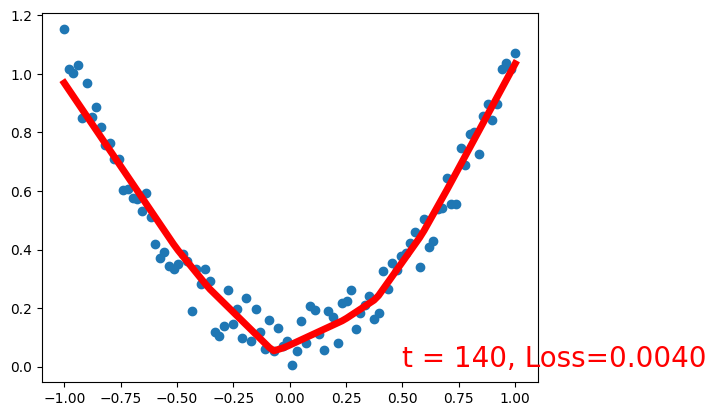

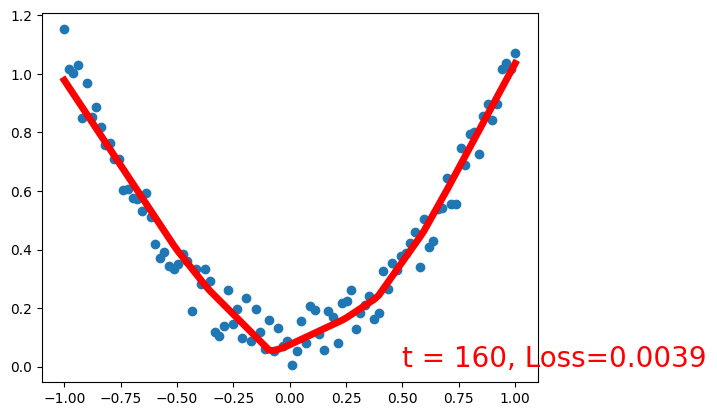

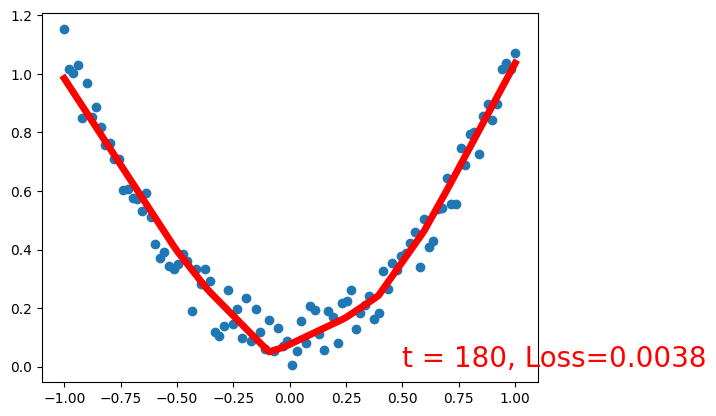

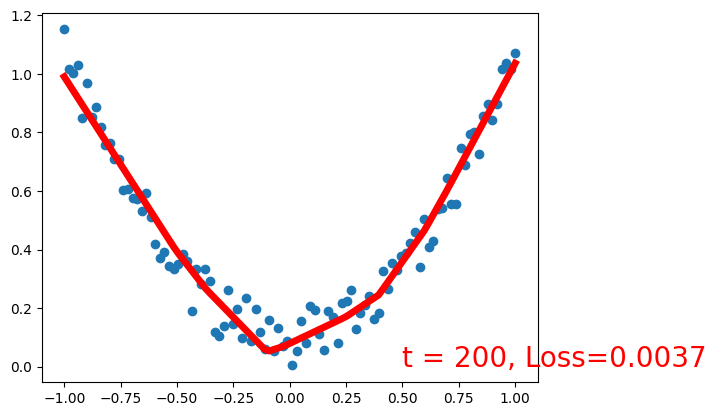

In [10]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()